In [1]:
# Load dataset
import os
print(os.path.exists(r'C:/Solar-challenge-week1/data/sierraleone-bumbuna.csv'))


False


In [2]:
import pandas as pd
import os

folder_path = r"C:\Solar-Challenge-Week 1\Solar-challenge-week1\data"
file_path = os.path.join(folder_path, 'sierraleone-bumbuna.csv')

df = pd.read_csv(file_path)

In [3]:
print(df.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [6]:
# Overview of the dataset
print("-----------------------------------------")
print(" An overview of the dataset: the first 5 rows ")
print(df.head())
# Overview of the dataset
print("-----------------------------------------")
print(" An overview of the dataset: the last 5 rows ")
print(df.tail())
# Overview of the dataset
print("-----------------------------------------")
print(" An overview of the dataset a random sample of 5 rows ")
print(df.sample(5))
# overview of the dataset
print("-----------------------------------------")
print(" An overview of the dataset: the  shape of the dataset ")
print(df.info())
# Check for missing values
print("-----------------------------------------")
print(" Check for missing values ")
print(df.isna().sum())
print(" The description of the numeric columns ")
print(df.describe())
# Overview of categorical columns
print("-----------------------------------------")
print(" The description of the categorical columns ")
print(df.describe(include=['object']))
# Overview of all columns
print("-----------------------------------------")
print(" The description of all columns ")
print(df.describe(include='all'))

-----------------------------------------
 An overview of the dataset: the first 5 rows 
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0      

In [8]:
import numpy as np
from scipy import stats

# Outliers detection

# Identify numeric columns

# compute the z-scores and falg outliers (|Z|>3)
numeric_cols = ["GHI", "DHI", "ModA", "ModB", "WS", "WSgust"]

# Compute the z-scores and flag outliers (|Z|>3)
z_scores = np.abs(stats.zscore(df[numeric_cols]))
oulier_flag = (z_scores > 3).any(axis=1)
print(f"number of outlier samples falgged:{sum(oulier_flag)}")

number of outlier samples falgged:10258


In [9]:
for col in numeric_cols:
    df.loc[oulier_flag, col] = df[col].median()

In [10]:
numeric_cols = ["GHI", "DHI", "ModA", "ModB", "WS", "WSgust"]

# compute the z-scores and falg outliers (|Z|>3)
# Adjust column names to match the actual dataframe
numeric_cols = ["GHI", "DHI", "ModA", "ModB", "WS", "WSgust"]

# Compute the z-scores and flag outliers (|Z|>3)
z_scores = np.abs(stats.zscore(df[numeric_cols]))
oulier_flag = (z_scores > 3).any(axis=1)
print(f"number of outlier samples falgged:{sum(oulier_flag)}")



number of outlier samples falgged:5692


In [12]:
# Define your country name
country_name = 'sierraleone-bumbuna'

# List of key columns to impute (update as needed)
key_columns = ["GHI", "DHI", "DNI", "ModA", "ModB", "WS", "WSgust"]

# Impute missing values with median
for col in key_columns:
    if col in df.columns:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

# Export cleaned DataFrame
output_dir = 'data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

output_path = os.path.join(output_dir, f"{country_name}_clean.csv")
df.to_csv(output_path, index=False)
print(f"Cleaned data saved to {output_path}")

C:\Users\samuel\AppData\Local\Temp\ipykernel_9548\1465745226.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\samuel\AppData\Local\Temp\ipykernel_9548\1465745226.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

Cleaned data saved to data\sierraleone-bumbuna_clean.csv


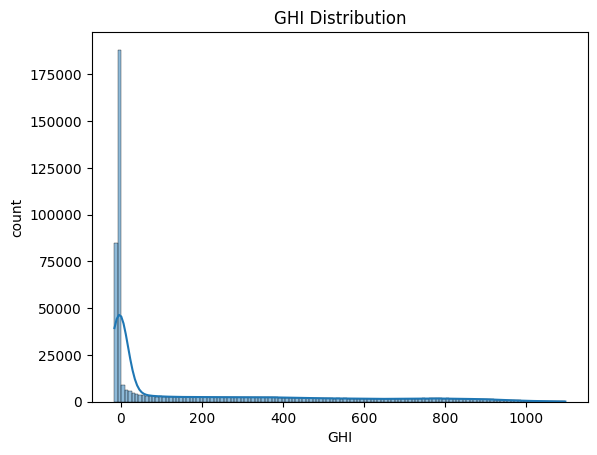

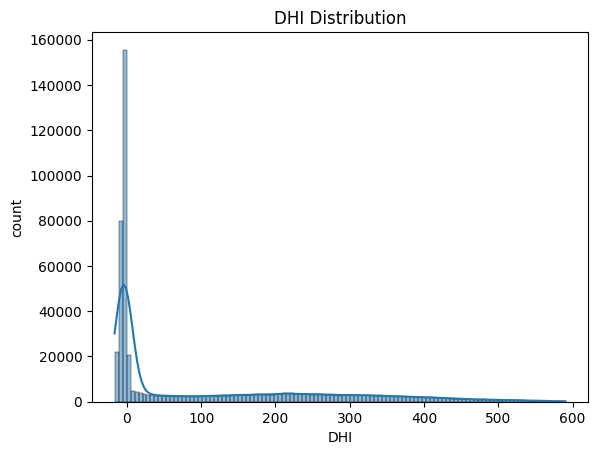

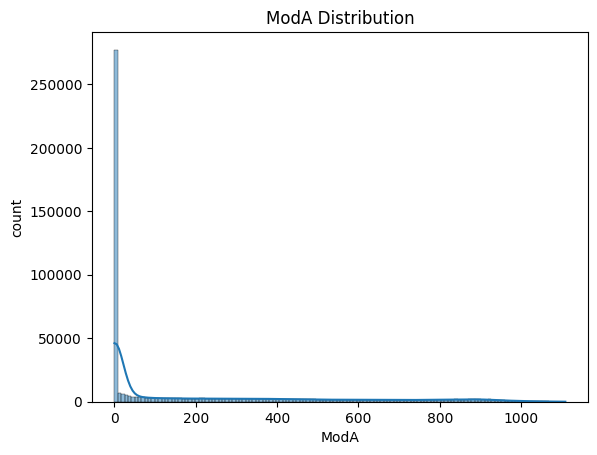

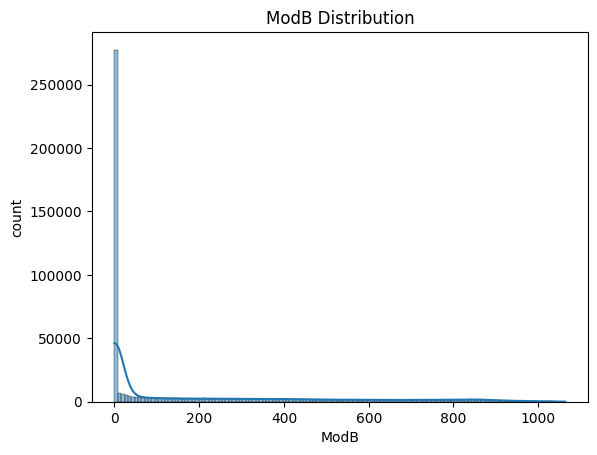

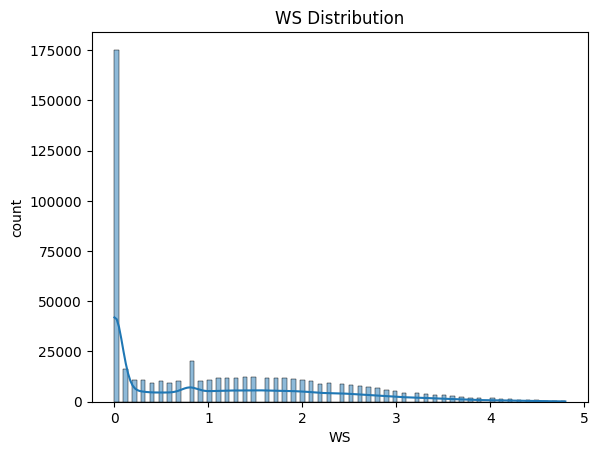

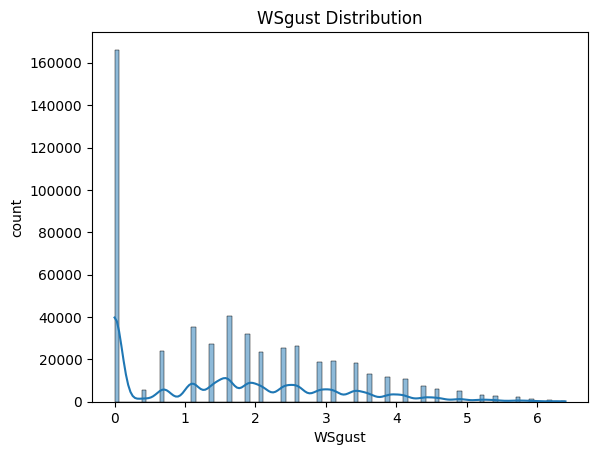

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for each numweric feature
for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

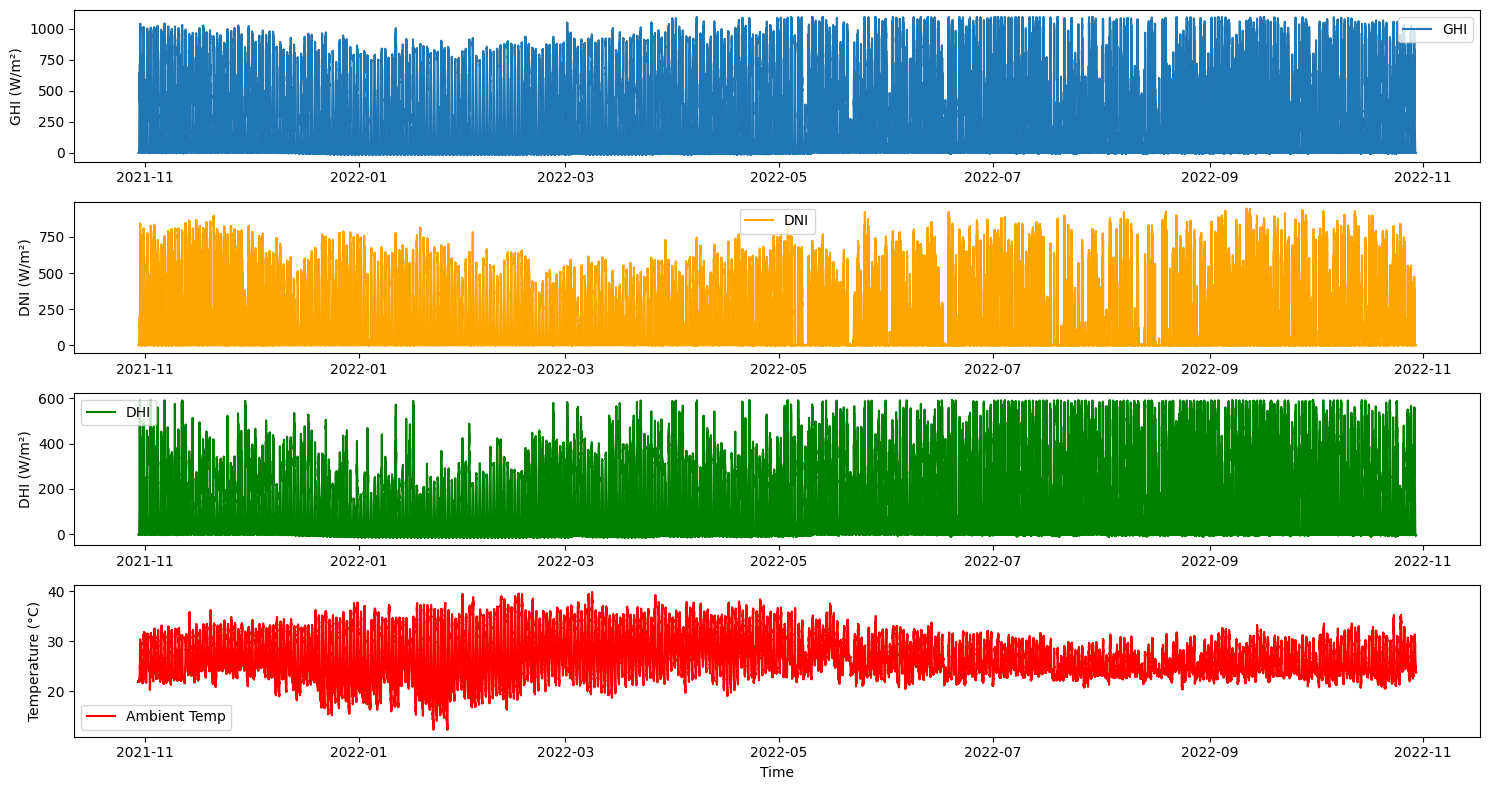

In [15]:
import matplotlib.pyplot as plt

# Convert 'Timestamp' to datetime if not already
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set 'Timestamp' as index for easier plotting
df.set_index('Timestamp', inplace=True)

# Plot GHI, DNI, DHI, Tamb over time
plt.figure(figsize=(15, 8))

plt.subplot(4, 1, 1)
plt.plot(df.index, df['GHI'], label='GHI')
plt.ylabel('GHI (W/m²)')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(df.index, df['DNI'], label='DNI', color='orange')
plt.ylabel('DNI (W/m²)')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(df.index, df['DHI'], label='DHI', color='green')
plt.ylabel('DHI (W/m²)')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(df.index, df['Tamb'], label='Ambient Temp', color='red')
plt.ylabel('Temperature (°C)')
plt.xlabel('Time')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\samuel\AppData\Local\Temp\ipykernel_9548\2173959627.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').mean()


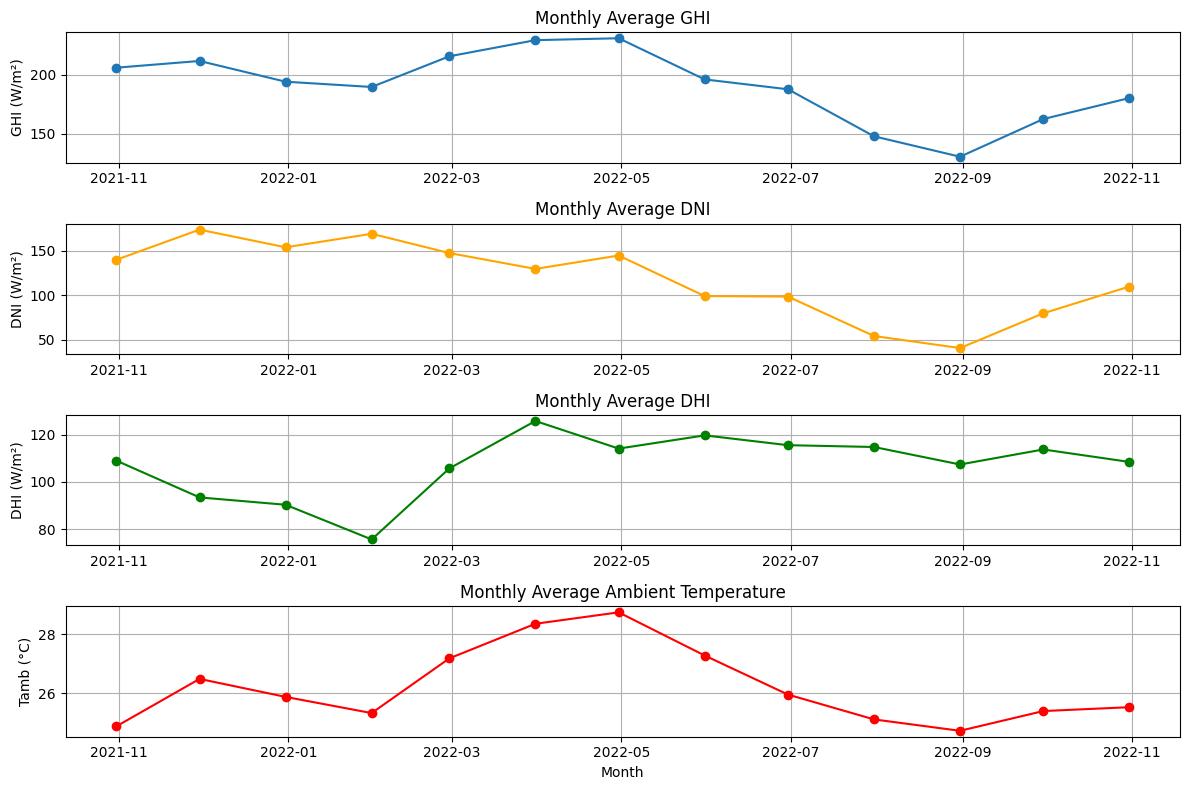

In [16]:
import matplotlib.pyplot as plt

# DataFrame is already indexed by Timestamp and in datetime format

# Resample by month, calculating mean values
monthly_data = df.resample('M').mean()

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(monthly_data.index, monthly_data['GHI'], marker='o')
plt.ylabel('GHI (W/m²)')
plt.title('Monthly Average GHI')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(monthly_data.index, monthly_data['DNI'], marker='o', color='orange')
plt.ylabel('DNI (W/m²)')
plt.title('Monthly Average DNI')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(monthly_data.index, monthly_data['DHI'], marker='o', color='green')
plt.ylabel('DHI (W/m²)')
plt.title('Monthly Average DHI')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(monthly_data.index, monthly_data['Tamb'], marker='o', color='red')
plt.ylabel('Tamb (°C)')
plt.title('Monthly Average Ambient Temperature')
plt.xlabel('Month')
plt.grid(True)

plt.tight_layout()
plt.show()

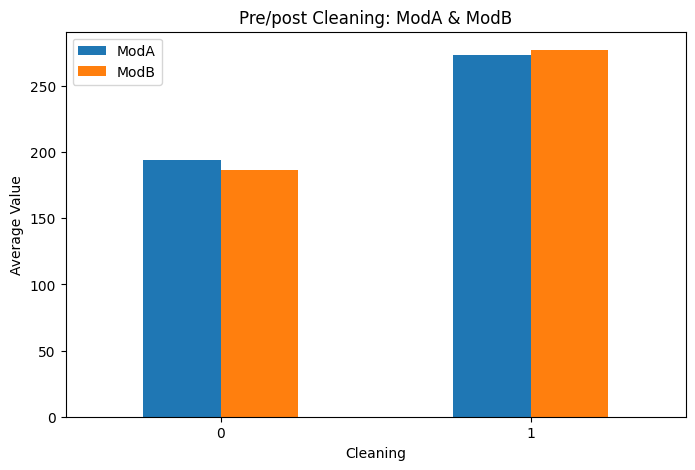

In [17]:
import matplotlib.pyplot as plt

# Group by Cleaning
grouped = df.groupby('Cleaning')

# Calculate mean of ModA and ModB for each group
mean_values = grouped[['ModA', 'ModB']].mean()

# Plot
mean_values.plot(kind='bar', figsize=(8, 5))
plt.ylabel('Average Value')
plt.title('Pre/post Cleaning: ModA & ModB')
plt.xticks(rotation=0)
plt.show()

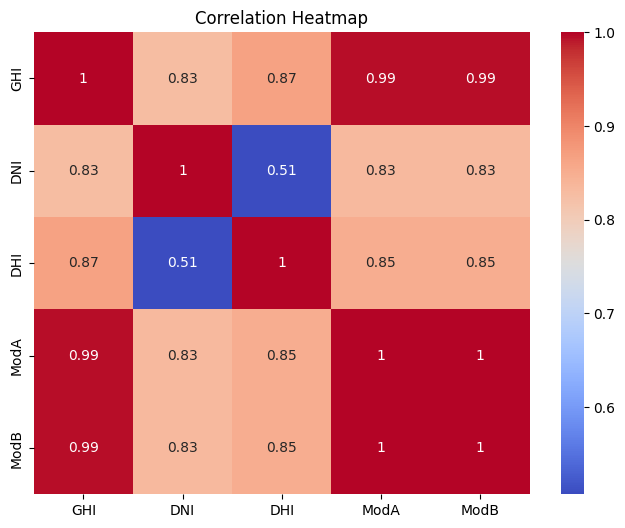

In [18]:
import seaborn as sns

corr_vars = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
corr_matrix = df[corr_vars].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

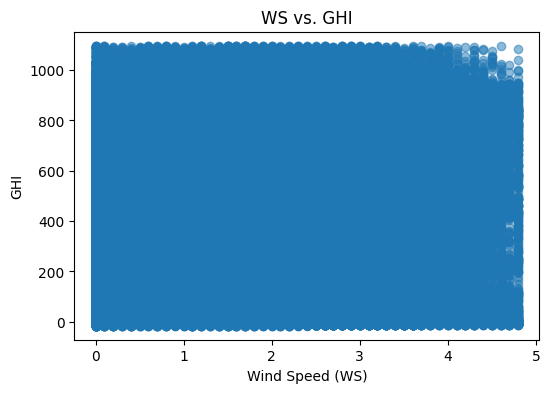

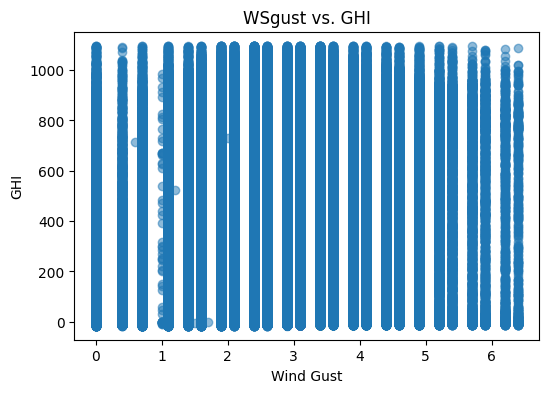

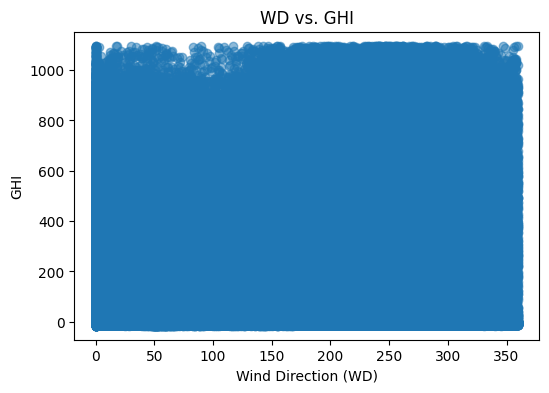

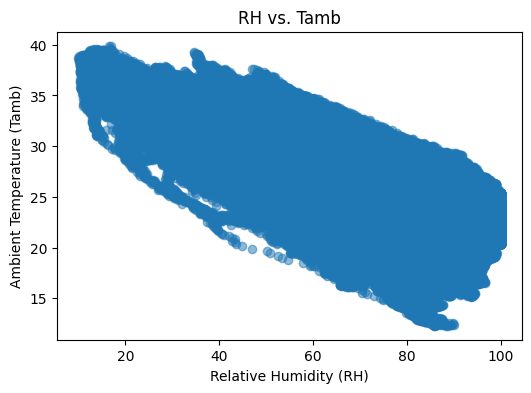

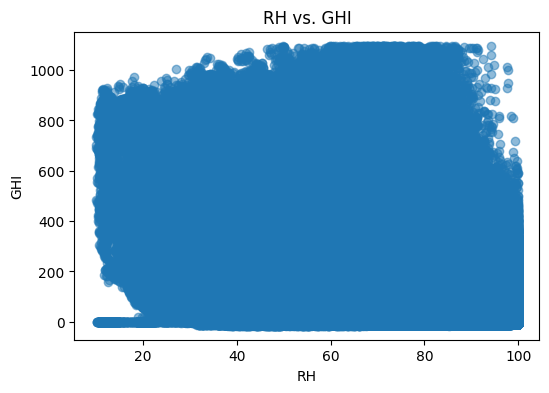

In [19]:
# Windspeed vs. GHI:
plt.figure(figsize=(6,4))
plt.scatter(df['WS'], df['GHI'], alpha=0.5)
plt.xlabel('Wind Speed (WS)')
plt.ylabel('GHI')
plt.title('WS vs. GHI')
plt.show()
# Wind Gust vs. GHI:
plt.figure(figsize=(6,4))
plt.scatter(df['WSgust'], df['GHI'], alpha=0.5)
plt.xlabel('Wind Gust')
plt.ylabel('GHI')
plt.title('WSgust vs. GHI')
plt.show()
# Wind Direction vs. GHI:
plt.figure(figsize=(6,4))
plt.scatter(df['WD'], df['GHI'], alpha=0.5)
plt.xlabel('Wind Direction (WD)')
plt.ylabel('GHI')
plt.title('WD vs. GHI')
plt.show()
# Relative Humidity vs. Temperature:
plt.figure(figsize=(6,4))
plt.scatter(df['RH'], df['Tamb'], alpha=0.5)
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.title('RH vs. Tamb')
plt.show()
# Relative Humidity vs. GHI

plt.figure(figsize=(6,4))
plt.scatter(df['RH'], df['GHI'], alpha=0.5)
plt.xlabel('RH')
plt.ylabel('GHI')
plt.title('RH vs. GHI')
plt.show()


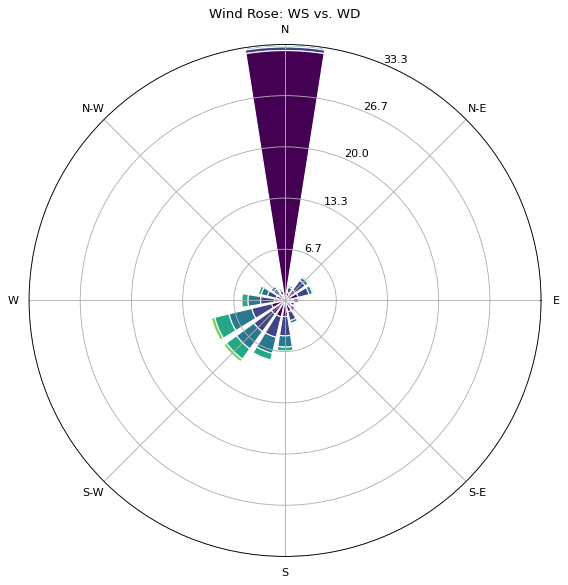

In [20]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

# Create windrose plot
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Rose: WS vs. WD')
plt.show()

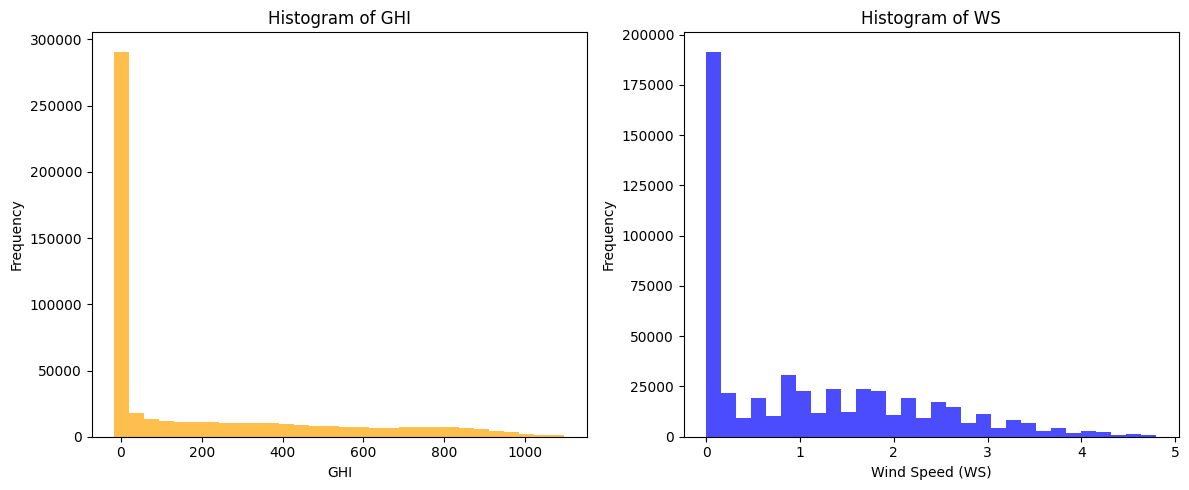

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.hist(df['GHI'].dropna(), bins=30, color='orange', alpha=0.7)
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.title('Histogram of GHI')

plt.subplot(1, 2, 2)
plt.hist(df['WS'].dropna(), bins=30, color='blue', alpha=0.7)
plt.xlabel('Wind Speed (WS)')
plt.ylabel('Frequency')
plt.title('Histogram of WS')

plt.tight_layout()
plt.show()

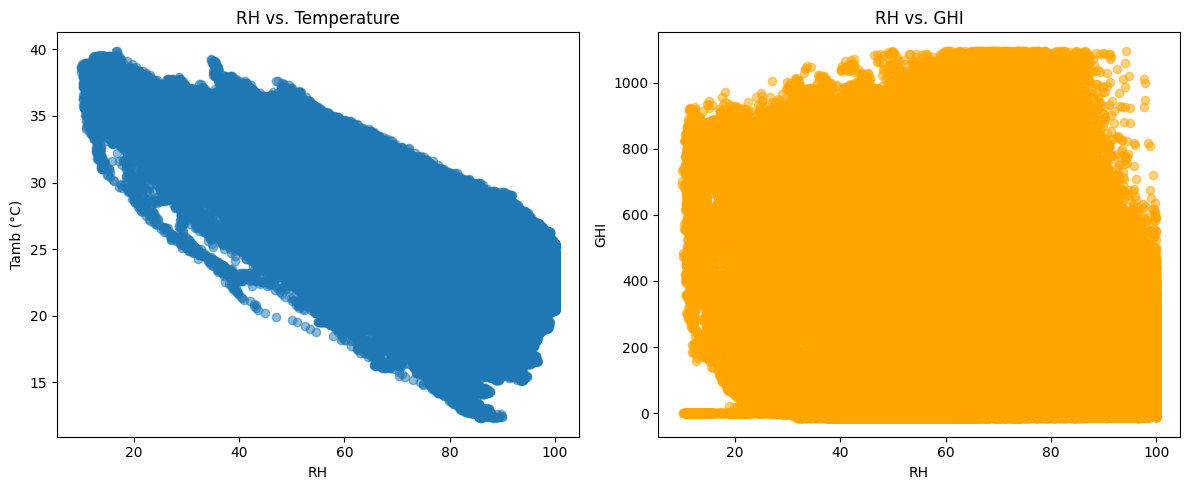

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.scatter(df['RH'], df['Tamb'], alpha=0.5)
plt.xlabel('RH')
plt.ylabel('Tamb (°C)')
plt.title('RH vs. Temperature')

plt.subplot(1, 2, 2)
plt.scatter(df['RH'], df['GHI'], alpha=0.5, color='orange')
plt.xlabel('RH')
plt.ylabel('GHI')
plt.title('RH vs. GHI')

plt.tight_layout()
plt.show()

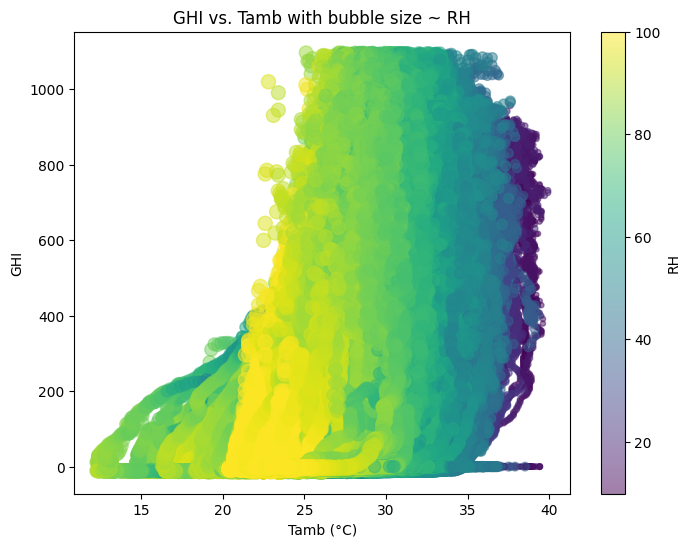

In [23]:
import numpy as np

# Bubble size based on RH (normalize for visibility)
sizes = (df['RH'] - df['RH'].min()) / (df['RH'].max() - df['RH'].min()) * 100 + 10  # scale for visibility

plt.figure(figsize=(8,6))
plt.scatter(df['Tamb'], df['GHI'], s=sizes, alpha=0.5, c=df['RH'], cmap='viridis')
plt.xlabel('Tamb (°C)')
plt.ylabel('GHI')
plt.title('GHI vs. Tamb with bubble size ~ RH')
plt.colorbar(label='RH')
plt.show()